<a href="https://colab.research.google.com/github/Palak-Malhotra/Asteroids/blob/main/NASA%20-%20Nearest%20Earth%20Objects/Random%20Forest/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv("/content/neo.csv")

In [3]:
# Check the column indices in your dataset
print(dataset.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


In [4]:
dataset.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
X = dataset.iloc[:, [2,3,4,5,8]].values
y = dataset.iloc[:, 9].values

print(X)

[[1.19827080e+00 2.67941497e+00 1.35692492e+04 5.48397441e+07
  1.67300000e+01]
 [2.65800000e-01 5.94346868e-01 7.35887267e+04 6.14381265e+07
  2.00000000e+01]
 [7.22029558e-01 1.61450717e+00 1.14258692e+05 4.97987249e+07
  1.78300000e+01]
 ...
 [3.19561887e-02 7.14562102e-02 7.56680773e+03 2.84007682e+07
  2.46000000e+01]
 [7.32073990e-03 1.63696720e-02 6.91991545e+04 6.86920605e+07
  2.78000000e+01]
 [3.98616229e-02 8.91332986e-02 2.70244556e+04 5.97721306e+07
  2.41200000e+01]]


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform your test data using the same imputer
X_test_imputed = imputer.transform(X_test)

In [9]:
import numpy as np

# Identify NaN values in training and test sets
nan_indices_train = np.isnan(X_train)
nan_indices_test = np.isnan(X_test)

# Replace NaN values with mean or any desired strategy
X_train[nan_indices_train] = np.nanmean(X_train)
X_test[nan_indices_test] = np.nanmean(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classification = RandomForestClassifier(n_estimators = 100, min_samples_split=4, random_state = 0)
classification.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=4, random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classification.predict(X_test)

print(y_pred)

[False False False ... False False False]


In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

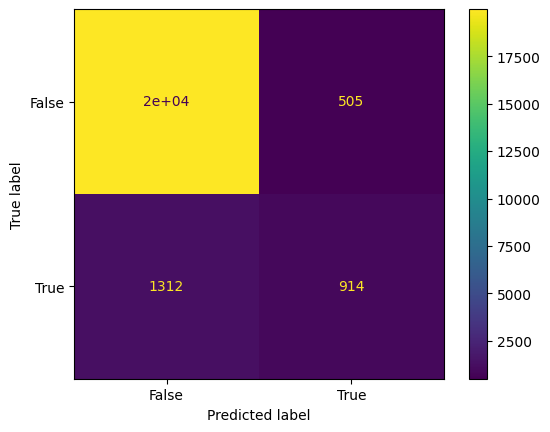

In [13]:
# Plotting the Confusion Matrix

classes= dataset['hazardous'].unique()

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9199876700867498
Precision: 0.9095307052553235
Recall: 0.9199876700867498
F1 Score: 0.9119032051384157
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96     20483
        True       0.64      0.41      0.50      2226

    accuracy                           0.92     22709
   macro avg       0.79      0.69      0.73     22709
weighted avg       0.91      0.92      0.91     22709

